### BostonHousing

In [ ]:

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## 데이터 읽어오기.
df = pd.read_csv("./BostonHousing.csv")




In [ ]:
print(df.info())
print(df.shape)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
(506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [ ]:
## key말고 해당하는 value값만 추출해서 입력과 정갑 데이터 분류
dataset = df.copy()

X = df.iloc[:, 0:13]
Y = df.iloc[:, 13:14]

In [ ]:
X1 = X.describe()
X1 = X1.transpose()


In [ ]:
def min_max_norm(x):
  return (x - X1['min']) / (X1['max'] - X1['min'])

def standard_norm(x):
  return (x - X1['mean']) / X1['std']

In [ ]:

min_max_norm_train_dataX = min_max_norm(X)
standard_norm_train_dataX = standard_norm(X)

In [ ]:
tf.random.set_seed(777)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=13, activation='sigmoid'))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 42,497
Trainable params: 42,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.04) ### 경사 하강법으로 global min 에 찾아가는 최적화 방법 선언.
loss=tf.keras.losses.mean_squared_error  ## 예측값 과 정답의 오차값 정의.
metrics=tf.keras.metrics.RootMeanSquaredError() ### 학습하면서 평가할 메트릭스 선언언

model.compile(loss =loss, optimizer= optimizer, metrics=[metrics])

In [ ]:
esult = model.fit(standard_norm_train_dataX, Y, epochs=2000, batch_size=10)

In [ ]:
print(esult.history.keys())

dict_keys(['loss', 'root_mean_squared_error'])


16/16 [==============================] - 0s 1ms/step - loss: 0.0429 - root_mean_squared_error: 0.2072

 Test rmse: 0.2072


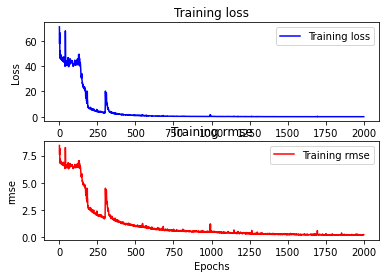

In [ ]:

### history에서 loss key를 가지는 값들만 추출
loss = esult.history['loss']

### loss그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 root_mean_squared_error key를 가지는 값들만 추출
rmse = esult.history['root_mean_squared_error']
epochs = range(1, len(rmse) + 1)

### mean_absolute_error를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'r-', label='Training rmse')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(standard_norm_train_dataX, Y)[1])) #RMES 는 0에 가까울수록 정답과 예측의 차이가 적다는 뜻 (ex:0이라면 정답)
plt.show()


###Normalization

In [ ]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 읽어오기.## 데이터 읽어오기.
raw_df = pd.read_csv("test.csv")
print("data info")
print(raw_df.info())
print("data head")
print(raw_df.head())

dataset=raw_df.copy()


In [ ]:
## 데이터의 min , max, mean, std 값 구하기.
data_stats = dataset.describe()
data_stats = data_stats.transpose()
print(dataset.describe())
print(data_stats)

              A           B            C     D
count  10.00000   10.000000    10.000000  10.0
mean    5.50000   55.000000   550.000000   2.0
std     3.02765   30.276504   302.765035   0.0
min     1.00000   10.000000   100.000000   2.0
25%     3.25000   32.500000   325.000000   2.0
50%     5.50000   55.000000   550.000000   2.0
75%     7.75000   77.500000   775.000000   2.0
max    10.00000  100.000000  1000.000000   2.0
   count   mean         std    min     25%    50%     75%     max
A   10.0    5.5    3.027650    1.0    3.25    5.5    7.75    10.0
B   10.0   55.0   30.276504   10.0   32.50   55.0   77.50   100.0
C   10.0  550.0  302.765035  100.0  325.00  550.0  775.00  1000.0
D   10.0    2.0    0.000000    2.0    2.00    2.0    2.00     2.0


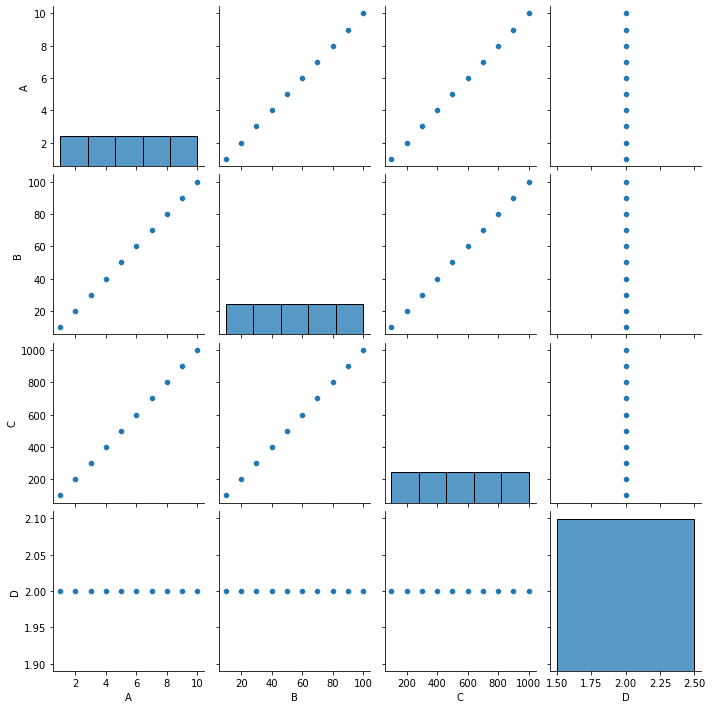

In [ ]:

## 데이터 분포도 확인하기.
sns.pairplot(dataset[['A','B','C','D']], diag_kind="hist")
plt.show()


In [ ]:

## 정답 데이터 추출
train_labels = dataset['D']


## data normalization
def min_max_norm(x):
  return (x - data_stats['min']) / (data_stats['max'] - data_stats['min'])

def standard_norm(x):
  return (x - data_stats['mean']) / data_stats['std']


In [ ]:

min_max_norm_train_data = min_max_norm(dataset)
standard_norm_train_data = standard_norm(dataset)


In [ ]:

print("min max : ")
print(min_max_norm_train_data)
print("standard : ")
print(standard_norm_train_data)

min max : 
          A         B         C   D
0  0.000000  0.000000  0.000000 NaN
1  0.111111  0.111111  0.111111 NaN
2  0.222222  0.222222  0.222222 NaN
3  0.333333  0.333333  0.333333 NaN
4  0.444444  0.444444  0.444444 NaN
5  0.555556  0.555556  0.555556 NaN
6  0.666667  0.666667  0.666667 NaN
7  0.777778  0.777778  0.777778 NaN
8  0.888889  0.888889  0.888889 NaN
9  1.000000  1.000000  1.000000 NaN
standard : 
          A         B         C   D
0 -1.486301 -1.486301 -1.486301 NaN
1 -1.156012 -1.156012 -1.156012 NaN
2 -0.825723 -0.825723 -0.825723 NaN
3 -0.495434 -0.495434 -0.495434 NaN
4 -0.165145 -0.165145 -0.165145 NaN
5  0.165145  0.165145  0.165145 NaN
6  0.495434  0.495434  0.495434 NaN
7  0.825723  0.825723  0.825723 NaN
8  1.156012  1.156012  1.156012 NaN
9  1.486301  1.486301  1.486301 NaN


### BostonHousing_Data_split

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

## 데이터 읽어오기.
df = pd.read_csv("./BostonHousing.csv")

In [ ]:
## key말고 해당하는 value값만 추출해서 입력과 정갑 데이터 분류
dataset = df.copy()

X = df.iloc[:, 0:13]
Y = df.iloc[:, 13:14]

In [ ]:
print("data info")
print(dataset.info())
print("data head")
print(dataset.head())

data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
data head
      CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8 

In [ ]:
## std와 min을 구하기 위한 X데이터 형 변환
X1 = X.describe()
X1 = X1.transpose()

In [ ]:
def min_max_norm(x):
  return (x - X1['min']) / (X1['max'] - X1['min'])

def standard_norm(x):
  return (x - X1['mean']) / X1['std']

In [ ]:
min_max_norm_train_dataX = min_max_norm(X)
standard_norm_train_dataX = standard_norm(X)

In [ ]:
print("min max : ")
print(min_max_norm_train_dataX)
print("standard : ")
print(standard_norm_train_dataX)

min max : 
         CRIM    ZN     INDUS  CHAS  ...       TAX   PTRATIO         B     LSTAT
0    0.000000  0.18  0.067815   0.0  ...  0.208015  0.287234  1.000000  0.089680
1    0.000236  0.00  0.242302   0.0  ...  0.104962  0.553191  1.000000  0.204470
2    0.000236  0.00  0.242302   0.0  ...  0.104962  0.553191  0.989737  0.063466
3    0.000293  0.00  0.063050   0.0  ...  0.066794  0.648936  0.994276  0.033389
4    0.000705  0.00  0.063050   0.0  ...  0.066794  0.648936  1.000000  0.099338
..        ...   ...       ...   ...  ...       ...       ...       ...       ...
501  0.000633  0.00  0.420455   0.0  ...  0.164122  0.893617  0.987619  0.219095
502  0.000438  0.00  0.420455   0.0  ...  0.164122  0.893617  1.000000  0.202815
503  0.000612  0.00  0.420455   0.0  ...  0.164122  0.893617  1.000000  0.107892
504  0.001161  0.00  0.420455   0.0  ...  0.164122  0.893617  0.991301  0.131071
505  0.000462  0.00  0.420455   0.0  ...  0.164122  0.893617  1.000000  0.169702

[506 rows x 13 c

In [ ]:
data_columns = []
for i in X.columns :
  data_columns.append(i)
  

In [ ]:
data_columns

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [ ]:
## 데이터 분포도 확인하기.
sns.pairplot(dataset[data_columns], diag_kind="kde")
plt.show()


In [ ]:
#### data 분리
X_train1, X_test, Y_train, Y_test = train_test_split(standard_norm_train_dataX, Y,
                                                     test_size=0.2, shuffle=False)

X_train, X_val, Y_train, Y_val = train_test_split()

print("x train")
print(X_train)
print("label train")
print(Y_train)

print("x val")
print(X_val)
print("label val")
print(Y_val)

print("x test")
print(X_test)
print("label test")
print(Y_test)


In [ ]:
tf.random.set_seed(777)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=13, activation='sigmoid'))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.summary()

In [ ]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.04) ### 경사 하강법으로 global min 에 찾아가는 최적화 방법 선언.
loss=tf.keras.losses.mean_squared_error  ## 예측값 과 정답의 오차값 정의.
metrics=tf.keras.metrics.RootMeanSquaredError() ### 학습하면서 평가할 메트릭스 선언언

model.compile(loss =loss, optimizer= optimizer, metrics=[metrics])

In [ ]:
esult = model.fit(standard_norm_train_dataX, Y, epochs=2000, batch_size=10)

In [ ]:
print(esult.history.keys())

In [ ]:
### history에서 loss key를 가지는 값들만 추출
loss = esult.history['loss']

### loss그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 root_mean_squared_error key를 가지는 값들만 추출
rmse = esult.history['root_mean_squared_error']
epochs = range(1, len(rmse) + 1)

### mean_absolute_error를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'r-', label='Training rmse')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(standard_norm_train_dataX, Y)[1])) #RMES 는 0에 가까울수록 정답과 예측의 차이가 적다는 뜻 (ex:0이라면 정답)
plt.show()

### BostonHousing Spilt(Ver.teacher)

In [ ]:
from google.colab import files
file_uploaded = files.upload()

In [ ]:
import pandas as pd
data = pd.read_csv('BostonHousing.csv')

In [ ]:
x_data = data.copy()

ori_y = x_data.pop('MEDV')

In [ ]:
from sklearn.model_selection import train_test_split

x_train1, x_test, y_train1, y_test = train_test_split(x_data, ori_y, test_size=0.3, shuffle=True)
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.2, shuffle=True)

In [ ]:
import tensorflow as tf

input_layer = tf.keras.layers.Input(shape=(13,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_layer)
x = tf.keras.layers.Dense(100, activation='sigmoid')(x)
x = tf.keras.layers.Dense(300, activation='sigmoid')(x)
out_layer = tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 50)                700       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 301       
Total params: 36,401
Trainable params: 36,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.mean_squared_error
optimizer = tf.keras.optimizers.SGD(lr=0.0004)
metrics = tf.keras.metrics.RootMeanSquaredError()
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metrics])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
result = model.fit(x_train, y_train, epochs = 200, batch_size = 10, validation_data=(x_valid, y_valid))

Epoch 1/200
29/29 [==============================] - 1s 10ms/step - loss: 213.5108 - root_mean_squared_error: 14.6120 - val_loss: 56.5327 - val_root_mean_squared_error: 7.5188
Epoch 2/200
29/29 [==============================] - 0s 3ms/step - loss: 90.7266 - root_mean_squared_error: 9.5251 - val_loss: 55.8079 - val_root_mean_squared_error: 7.4705
Epoch 3/200
29/29 [==============================] - 0s 3ms/step - loss: 88.1924 - root_mean_squared_error: 9.3911 - val_loss: 54.2560 - val_root_mean_squared_error: 7.3659
Epoch 4/200
29/29 [==============================] - 0s 4ms/step - loss: 88.6618 - root_mean_squared_error: 9.4160 - val_loss: 55.6550 - val_root_mean_squared_error: 7.4602
Epoch 5/200
29/29 [==============================] - 0s 3ms/step - loss: 88.1568 - root_mean_squared_error: 9.3892 - val_loss: 57.1211 - val_root_mean_squared_error: 7.5579
Epoch 6/200
29/29 [==============================] - 0s 3ms/step - loss: 87.8530 - root_mean_squared_error: 9.3730 - val_loss: 55.09

In [ ]:
print(result.history.keys())

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


In [ ]:
loss = result.history['loss']
val_loss = result.history['val_loss']

5/5 [==============================] - 0s 2ms/step - loss: 68.3463 - root_mean_squared_error: 8.2672

 Test rmse: 8.2672


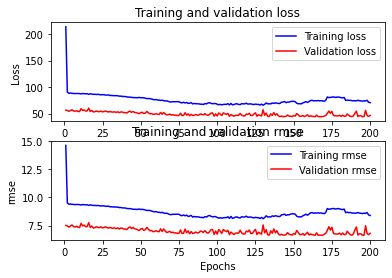

In [ ]:
import matplotlib.pyplot as plt


### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 mean_absolute_error val_mean_absolute_error key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
val_rmse = result.history['val_root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### mean_absolute_error val_mean_absolute_error key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'b-', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.title('Training and validation rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(x_test, y_test)[1]))

plt.show()

### One_hot_Encoding

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
from google.colab import files
file_uploaded = files.upload()

Saving one_hot_encording_test.csv to one_hot_encording_test (1).csv


In [ ]:
data = pd.read_csv('./one_hot_encording_test.csv', names = ["length", "width", "height", "volume", "class_name"])

In [ ]:
x_data = data.copy()
y_data = x_data.pop('class_name')

print("data value : {}".format(x_data))
print("data Label : {}".format(y_data))

data value :     length  width  height  volume
0      5.1    0.5     1.4    0.02
1      4.9    0.2     1.4    0.03
2      4.7    0.2     1.3    0.04
3      4.6    0.1     1.5    0.05
4      5.0    0.6     1.4    0.02
5      5.4    0.9     1.7    0.03
6      4.6    0.4     1.4    0.33
7      5.0    0.4     1.5    0.12
8      4.4    0.9     1.4    0.12
9      3.9    0.1     1.5    0.21
10     2.2    0.5     1.4    0.03
11     4.2    0.0     1.4    0.02
12     5.1    0.2     1.3    0.05
13     4.2    0.1     1.5    0.06
14     2.0    0.6     1.4    0.07
15     4.4    0.9     1.7    0.08
16     7.6    0.4     1.4    0.02
17     8.0    0.4     1.5    0.09
18     6.4    0.9     1.4    0.04
19     5.9    0.1     1.5    0.02
data Label : 0        car
1        car
2        car
3      truck
4      truck
5      truck
6        bus
7     person
8     person
9        bus
10       car
11       car
12       car
13     truck
14     truck
15     truck
16       bus
17    person
18    person
19       bus


In [ ]:
# case 1) sklearn
# Label Encoder는 독립 변수가 아닌 종속 변수(라벨)에 대해 사용한다. 
# 문자열이나 정수로된 라벨 값을  0  ~  K−1 까지의 정수로 변환.

e = LabelEncoder()
e.fit(y_data)
print("Label Class String : {}".format(e.classes_))

Y = e.transform(y_data)
print("Label Class int : {}".format(Y))

y_encoded = tf.keras.utils.to_categorical(Y)
print("case 1 One hot label class : {}".format(y_encoded))

print(np.argmax(y_encoded, axis=1).reshape(-1,1)) 
print(y_encoded.shape)

Label Class String : ['bus' 'car' 'person' 'truck']
Label Class int : [1 1 1 3 3 3 0 2 2 0 1 1 1 3 3 3 0 2 2 0]
case 1 One hot label class : [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[1]
 [1]
 [1]
 [3]
 [3]
 [3]
 [0]
 [2]
 [2]
 [0]
 [1]
 [1]
 [1]
 [3]
 [3]
 [3]
 [0]
 [2]
 [2]
 [0]]
(20, 4)


In [ ]:
# case 2) pandas
one_hot_label = pd.get_dummies(y_data)
print("case2 one_hot_label : ", one_hot_label)
print(one_hot_label.shape)

case2 one_hot_label :      bus  car  person  truck
0     0    1       0      0
1     0    1       0      0
2     0    1       0      0
3     0    0       0      1
4     0    0       0      1
5     0    0       0      1
6     1    0       0      0
7     0    0       1      0
8     0    0       1      0
9     1    0       0      0
10    0    1       0      0
11    0    1       0      0
12    0    1       0      0
13    0    0       0      1
14    0    0       0      1
15    0    0       0      1
16    1    0       0      0
17    0    0       1      0
18    0    0       1      0
19    1    0       0      0
(20, 4)


### Iris multi classification

In [ ]:
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd

In [ ]:
# csv read
data = pd.read_csv('./iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

In [ ]:
x_data = data.copy()
y_data = x_data.pop("species")
X = x_data.copy()

In [ ]:
print(y_data)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


In [ ]:
# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(y_data)
y = e.transform(y_data)
y_encoded = tf.keras.utils.to_categorical(y)

In [ ]:
# train과 test를 분리
x_train1, x_test, y_train1, y_test = train_test_split(X, y_encoded, test_size=0.1, shuffle=True) 
# train set에서 train과 validation 분리
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.2, shuffle=True)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(108, 4)
(108, 3)


In [ ]:
input_layer = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(16, activation='sigmoid')(input_layer)
x = tf.keras.layers.Dense(32, activation='sigmoid')(x)
output_layer = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(inputs=[input_layer], outputs = [output_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.04)
metrics = tf.keras.metrics.categorical_accuracy
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

In [ ]:
history = model.fit(x_train, y_train, epochs=200, batch_size=50, validation_data=(x_valid, y_valid))

Epoch 1/200
3/3 [==============================] - 1s 104ms/step - loss: 1.1225 - categorical_accuracy: 0.3333 - val_loss: 1.1248 - val_categorical_accuracy: 0.1481
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 1.1216 - categorical_accuracy: 0.1111 - val_loss: 1.1273 - val_categorical_accuracy: 0.2963
Epoch 3/200
3/3 [==============================] - 0s 11ms/step - loss: 1.1196 - categorical_accuracy: 0.3426 - val_loss: 1.1206 - val_categorical_accuracy: 0.1481
Epoch 4/200
3/3 [==============================] - 0s 11ms/step - loss: 1.1214 - categorical_accuracy: 0.0926 - val_loss: 1.1192 - val_categorical_accuracy: 0.1481
Epoch 5/200
3/3 [==============================] - 0s 12ms/step - loss: 1.1197 - categorical_accuracy: 0.2407 - val_loss: 1.1018 - val_categorical_accuracy: 0.4444
Epoch 6/200
3/3 [==============================] - 0s 11ms/step - loss: 1.1211 - categorical_accuracy: 0.3333 - val_loss: 1.1157 - val_categorical_accuracy: 0.0000e+00
Epoch 7/200

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


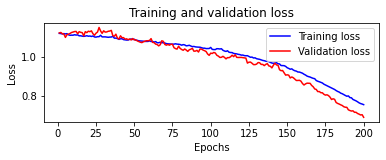

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

# loss와 val_loss를 그래프
epochs = range(1, len(loss)+1)
plt.subplot(211)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

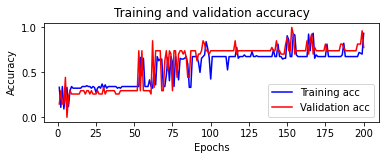

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
print("\n Test Accuracy : %.4f" %(model.evaluate(x_test, y_test)[1]))

1/1 [==============================] - 0s 17ms/step - loss: 0.8508 - categorical_accuracy: 0.4667

 Test Accuracy : 0.4667


In [ ]:
model.save('iris_multi_model.h5')

### 모델 불러오기

In [ ]:
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd

In [ ]:
# csv read
data = pd.read_csv('./iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

In [ ]:
x_data = data.copy()
y_data = x_data.pop("species")
X = x_data.copy()

In [ ]:
# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(y_data)
y = e.transform(y_data)
y_encoded = tf.keras.utils.to_categorical(y)

In [ ]:
# train과 test를 분리
x_train1, x_test, y_train1, y_test = train_test_split(X, y_encoded, test_size=0.1, shuffle=True) 
# train set에서 train과 validation 분리
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.2, shuffle=True)

In [ ]:
model_path = "./{epoch:02d}-{val_loss:.4f}.h5"

model = tf.keras.models.load_model('iris_multi_model.h5')

In [ ]:
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

### 모델 중단됐을때, retrain

In [ ]:
# csv read
data = pd.read_csv('./iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

In [ ]:
x_data = data.copy()
y_data = x_data.pop("species")
X = x_data.copy()

In [ ]:
# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(y_data)
y = e.transform(y_data)
y_encoded = tf.keras.utils.to_categorical(y)

In [ ]:
# train과 test를 분리
x_train1, x_test, y_train1, y_test = train_test_split(X, y_encoded, test_size=0.1, shuffle=True) 
# train set에서 train과 validation 분리
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.2, shuffle=True)

In [ ]:
model = tf.keras.models.load_model('iris_multi_model.h5')
model.summary()

In [ ]:
# 모델 컴파일
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[tf.keras.metrics.categorical_accuracy])

In [ ]:
modelpath = "./{epoch:02d}-{val_loss:.4f}.h5"
callback_list = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),
                 tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True),
                 tf.keras.callbacks.LearningRateScheduler(step_decay, verbose=1)]
                  # ModelCheckpoint
                  # LearningRateScheduler

In [ ]:
result = model.fit(x_train, y_train, epochs=200, batch_size= 50, validation_data = (x_valid, y_valid), callbacks=callback_list)
#model.save('iris_multi_model2.h5')

In [ ]:
print(result.history.keys())

In [ ]:
### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
val_loss = result.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 binary_accuracy와 val_binary_accuracy key를 가지는 값들만 추출
acc = result.history['categorical_accuracy']
val_acc = result.history['val_categorical_accuracy']

### binary_accuracy와 val_binary_accuracy key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

In [ ]:
def step_decay(epoch) : 
  initial_lrate = 0.001
  drop = 0.98
  epochs_drop = 50.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/ epochs_drop))
  return lrate

In [ ]:
# model path = './best_model/{epoch:02d}-{val_loss : .4f}.h5"
# callback list = EarlyStopping
                  # ModelCheckpoint
                  # LearningRateScheduler